In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [98]:
#Model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# **Part I : Exploratory Data Analysis**


## **Question 1** : 
- Start by checking the nature of the different variables and their encoding. 
- Convert the variable Year into a qualitative variable. **TO DO**
- Convert the variable Density (P/Km2) into a numeric variable. **TO DO**

In [99]:
#Load and print the 5 first lines of the DataFrame
data = pd.read_csv("global-data-on-sustainable-energy (1).csv")
data.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [100]:
#Print the shape of the DataFrame
data.shape

(3649, 21)

In [101]:
#Print different characteristic of the different variables in the DataFrame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [102]:
data.describe(include = 'object').T

,count,unique,top,freq
Entity,3649,176,Afghanistan,21
Density\n(P/Km2),3648,124,25,147


In [103]:
#Print  the number of unique values for ecah variables
unique_values =  data.nunique()
unique_values

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [104]:
#Print information on the DataFrame and its variables such as the type of each vraiable and their non-zero value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [105]:
#Print the type of each variables of the DataFrame
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

## **Question 2** : 
- Determine the rate of missing values for each variable.
- For this project, we propose to remove the variables with a very high rate of missing data:
    - Renewable-electricity-generating-capacity-per-capita
    - Financial flows to developing countries (US Dollars) 
    - Renewables (% equivalent primary energy)

In [106]:
#Printing the number of missing value for each vraiables in the DataFrame
data.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [107]:
# Calculating the count of missing values in each column
missing_values = data.isna().sum()

# Creating a bar plot showing these missing values using Plotly Express
fig = px.bar(x=missing_values.index, y=missing_values.values, labels={'x': 'Columns', 'y': 'Missing Values Count'},
             title='Count of Missing Values in Each Column')
fig.show()

In [108]:
#Retrieving the variable's full names
print(data.columns)

#Deleting the columns corresponding tp the variables with too many missing values
data.drop(columns=['Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)','Renewable-electricity-generating-capacity-per-capita'], inplace=True)

#Verifying that the wanted variables are well deleted from the DataFrame (before (3649,21) after (3649,18))
data.shape

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


(3649, 18)

## **Question 3** : 
- For the rest of the study, you will create a dataset containing only those individuals with no missing
values. This will leave 2868 observations

In [109]:

# Calculate mean for specific columns
Mean_Access = data['Access to clean fuels for cooking'].mean()
Mean_Renewable = data['Renewable energy share in the total final energy consumption (%)'].mean()
Mean_Electricity = data['Electricity from nuclear (TWh)'].mean()
Mean_Energy = data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean()
Mean_Value_co2 = data['Value_co2_emissions_kt_by_country'].mean()
Mean_gdp_growth = data['gdp_growth'].mean()
Mean_gdp_per_capita = data['gdp_per_capita'].mean()

# Fill missing values in specific columns with calculated means
data['Access to clean fuels for cooking'].fillna(Mean_Access, inplace=True)
data['Renewable energy share in the total final energy consumption (%)'].fillna(Mean_Renewable, inplace=True)
data['Electricity from nuclear (TWh)'].fillna(Mean_Electricity, inplace=True)
data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(Mean_Energy, inplace=True)
data['Value_co2_emissions_kt_by_country'].fillna(Mean_Value_co2, inplace=True)
data['gdp_growth'].fillna(Mean_gdp_growth, inplace=True)
data['gdp_per_capita'].fillna(Mean_gdp_per_capita, inplace=True)

# Drop rows with any remaining missing values
data = data.dropna()

# Display the shape of the DataFrame after cleaning
data.shape

(3597, 18)

In [110]:

duplicate_rows = data[data.duplicated(keep='first')]


num_duplicates = duplicate_rows.shape[0]


print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude


In [111]:
data.rename(columns={"Value_co2_emissions_kt_by_country":"CO2" , 'Land Area(Km2)':'Land'} , inplace=True)

In [112]:
data.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
data['Density'] = data['Density'].str.replace(',', '').astype(int)

In [113]:
# Selecting specific columns 'Entity' and 'Land' into a new DataFrame
energy_land = data[['Entity', 'Land']]

# Dropping rows with missing values in the selected columns
energy_land = energy_land.dropna()

# Getting unique country names from the 'Entity' column
countries = energy_land['Entity'].unique()

# Getting unique land area values from the 'Land' column
land = energy_land['Land'].unique()

# Clean the land area values by converting to integers
land_int = []
for num in land:
    if isinstance(num, float):
        land_int.append(int(num))
    else:
        land_int.append(int(str(num).replace(',', '')))


In [114]:
# Columns to be scaled
columns_to_scale = ['Electricity from fossil fuels (TWh)','CO2',
                    'Land','Electricity from nuclear (TWh)','Electricity from renewables (TWh)','Density']

# Select only the columns to be scaled
data_to_scale = data[columns_to_scale]

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler(copy=True)

# Scale the selected columns
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with the scaled values
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaled_data

# Display the scaled DataFrame
data_scaled.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2,gdp_growth,gdp_per_capita,Density,Land,Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.000031,0.0,0.000142,65.957440,302.59482,1.64,0.000071,3.441610,13283.774348,0.007179,0.065323,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.000017,0.0,0.000229,84.745766,236.89185,1.74,0.000068,3.441610,13283.774348,0.007179,0.065323,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.000025,0.0,0.000256,81.159424,210.86215,1.40,0.000096,3.441610,179.426579,0.007179,0.065323,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.000060,0.0,0.000288,67.021280,229.96822,1.40,0.000114,8.832278,190.683814,0.007179,0.065323,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.000064,0.0,0.000256,62.921350,204.23125,1.20,0.000096,1.414118,211.382074,0.007179,0.065323,33.93911,67.709953


In [115]:
data.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude'],
      dtype='object')

In [116]:
data.shape

(3597, 18)

## **Question 4** : 
- Start your exploration with a unidimensional descriptive analysis of the data. 
- Do you think transformations of quantitative variables are relevant?

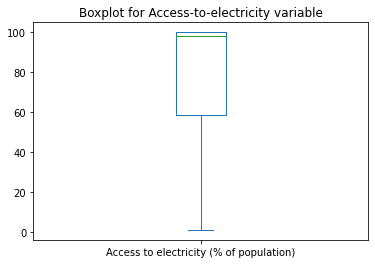

In [84]:
data['Access to electricity (% of population)'].plot(kind='box')
plt.title("Boxplot for Access-to-electricity variable")
plt.show()

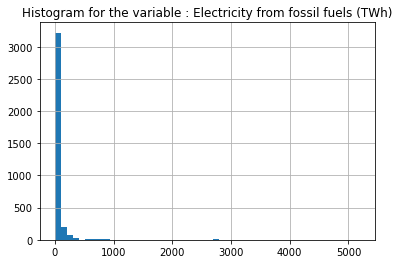

In [85]:
# We can also represent the variables using histograms.
data['Electricity from fossil fuels (TWh)'].hist(bins = 50)
plt.title("Histogram for the variable : Electricity from fossil fuels (TWh)")
plt.show()

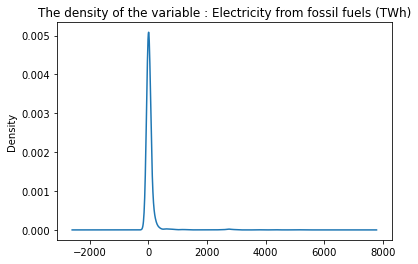

In [86]:
#It is also possible to represent the densities of the variables. This method could allow us to better select the variables to be transformed.
data["Electricity from fossil fuels (TWh)"].plot(kind="density")
plt.title("The density of the variable : Electricity from fossil fuels (TWh)")
plt.show()

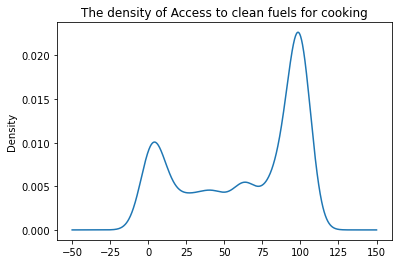

In [87]:
#Density of the variables "Access to clean fuels for cooking"
data["Access to clean fuels for cooking"].plot(kind="density")
plt.title("The density of Access to clean fuels for cooking")
plt.show()

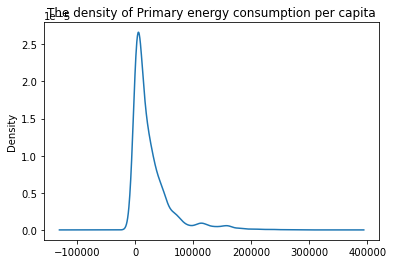

In [88]:
#For this variable, for example, we will not propose a transformation. Instead, we will explore other variables, such as "Primary energy consumption per capita".
data["Primary energy consumption per capita (kWh/person)"].plot(kind="density")
plt.title("The density of Primary energy consumption per capita")
plt.show()

In [89]:
#As we can see, the varleurs of this variable are poorly represented. We propose to assign it a log transformation.
from math import sqrt, log
data["Primary energy consumption per capita log"]=data["Primary energy consumption per capita (kWh/person)"].map(lambda x: log(x))
del data["Primary energy consumption per capita (kWh/person)"]

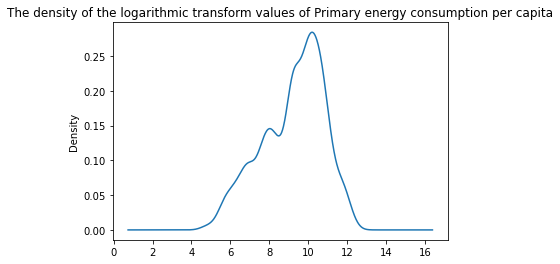

In [90]:
data["Primary energy consumption per capita log"].plot(kind="density")
plt.title("The density of the logarithmic transform values of Primary energy consumption per capita")
plt.show()

#We have performed our logarithmic transformation on the "Primary energy consumption per capita" variable.

## **Question 5** : 
- Visualize the great heterogeneity of CO2 emissions between countries. 
- Which 5 countries emit the most CO2?

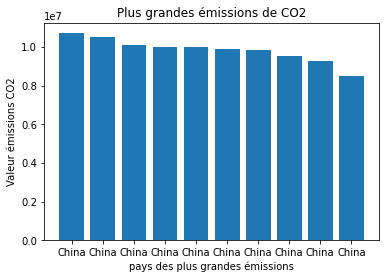

In [91]:
CO2_grand = data['CO2'].nlargest(10)
pays_CO2_grand=data.loc[CO2_grand.index]['Entity']

plt.figure()
plt.bar(range(len(CO2_grand)), CO2_grand)
plt.title("Plus grandes émissions de CO2")
plt.xlabel("pays des plus grandes émissions")
plt.ylabel("Valeur émissions CO2")
plt.xticks(range(len(CO2_grand)), pays_CO2_grand)
plt.show()

In [92]:
CO2_max = data.groupby('Entity')['CO2'].max().reset_index()
CO2_max = CO2_max.sort_values(by='CO2', ascending=False)

CO2_max5=CO2_max.head(5)

fig = px.bar(
    CO2_max5,  
    x='Entity',  
    y='CO2',  
    color='CO2',  
    title='Top 5 des pays ayant le plus emis de CO2',  
    labels={'Country': 'Pays', 'CO2': 'Emissions CO2'},  
    template='plotly_white'  
)

fig.show()

## **Question 6** : 
- Continue with a multidimensional descriptive analysis. Use visualization techniques: e.g. scatterplots, correlation graphs... 
- Analyze dependencies between quantitative variables.

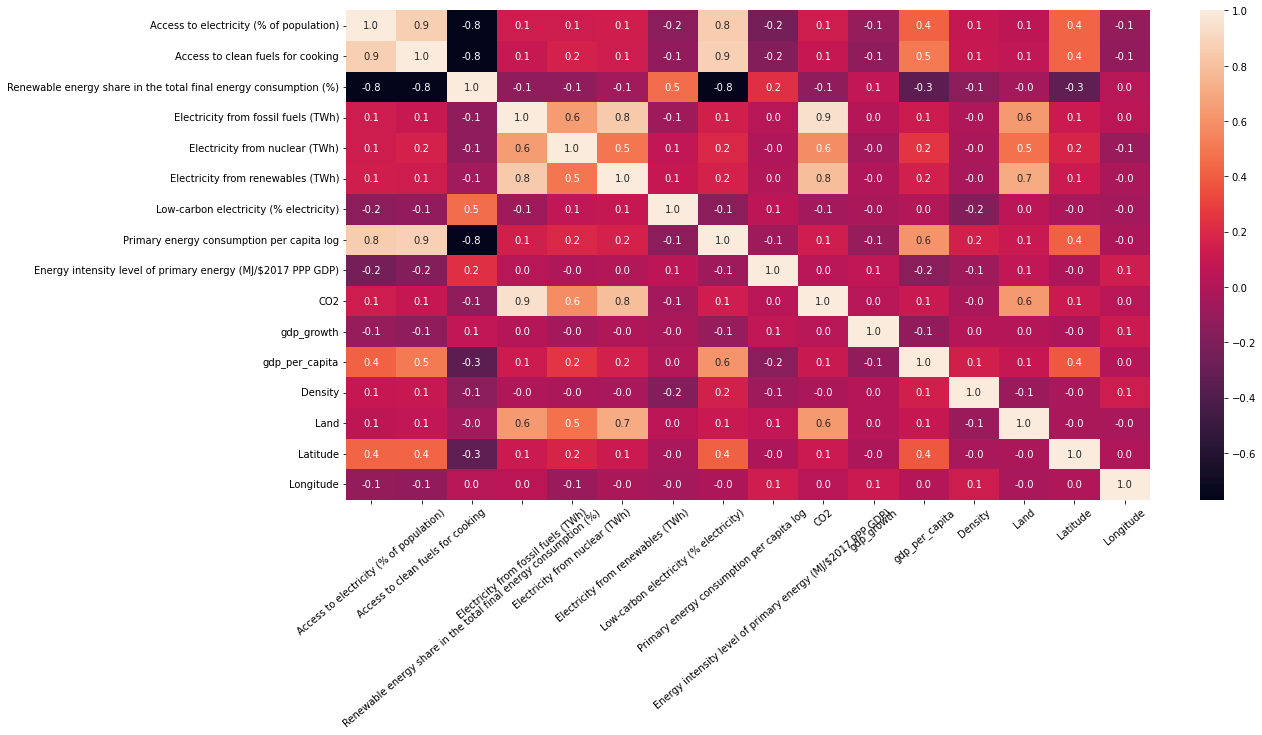

In [94]:
plt.figure(figsize=(18,9))

cols=[ 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita log',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'CO2',
       'gdp_growth', 'gdp_per_capita', 'Density', 'Land', 'Latitude',
       'Longitude']

# correlation between columns
sns.heatmap(data[cols].corr(), annot=True, fmt='.1f')
plt.xticks(rotation=40)

plt.show()

In [ ]:
data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2                                                                 float64
gdp_growth                                                          float64
gdp_per_capita                                                      float64
Density     

## **Question 7** : 
- Perform a principal component analysis of quantitative variables and interpret the results.

## **Question 8** : 
- Visualize the possible dependency between the variable Year and the variable to be predicted.

In [95]:
CO2_max_year = data.groupby('Year')['CO2'].max().reset_index()
CO2_max_year = CO2_max_year.sort_values(by='CO2', ascending=True)

CO2_max_year5=CO2_max_year.head(25)

fig = px.bar(
    CO2_max_year5,  
    x='Year',  
    y='CO2',  
    color='CO2',  
    title='CO2 en fonction des années',  
    labels={'Country': 'Year', 'CO2': 'Emissions CO2'},  
    template='plotly_white'  
)

fig.show()

# **Part II : Modelisation**